## Data Cleaning Assignment

For this assignment we'll focus on cleaning the TOTAL_REVENUE and TOTAL_EXPENDITURE columns in relation to year and state in our dataset found here: [U.S. Education Dataset](https://www.kaggle.com/noriuk/us-education-datasets-unification-project/home) 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
education_df = pd.read_csv('C:\Thinkful\Data Cleaning\states_all.csv')

Let's see the data types and how many null values we're working with.

In [2]:
##show data types for each column
education_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1229 non-null float64
TOTAL_REVENUE                   1280 non-null float64
FEDERAL_REVENUE                 1280 non-null float64
STATE_REVENUE                   1280 non-null float64
LOCAL_REVENUE                   1280 non-null float64
TOTAL_EXPENDITURE               1280 non-null float64
INSTRUCTION_EXPENDITURE         1280 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1280 non-null float64
OTHER_EXPENDITURE               1229 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1280 non-null float64
GRADES_PK_G                     1319 non-null float64
GRADES_KG_G                     1360 non-null float64
GRADES_4_G                      1361 non-null float64
GRADES_8_G                      1

In [3]:
##show percentage of null values in each column
education_df.isnull().mean()

PRIMARY_KEY                     0.000000
STATE                           0.000000
YEAR                            0.000000
ENROLL                          0.176273
TOTAL_REVENUE                   0.142091
FEDERAL_REVENUE                 0.142091
STATE_REVENUE                   0.142091
LOCAL_REVENUE                   0.142091
TOTAL_EXPENDITURE               0.142091
INSTRUCTION_EXPENDITURE         0.142091
SUPPORT_SERVICES_EXPENDITURE    0.142091
OTHER_EXPENDITURE               0.176273
CAPITAL_OUTLAY_EXPENDITURE      0.142091
GRADES_PK_G                     0.115952
GRADES_KG_G                     0.088472
GRADES_4_G                      0.087802
GRADES_8_G                      0.087802
GRADES_12_G                     0.087802
GRADES_1_8_G                    0.087802
GRADES_9_12_G                   0.087802
GRADES_ALL_G                    0.115952
AVG_MATH_4_SCORE                0.640751
AVG_MATH_8_SCORE                0.643432
AVG_READING_4_SCORE             0.642761
AVG_READING_8_SC

### Dealing with missing values

In [4]:
##create new df with only our columns of focus
rev_exp = education_df[['STATE','YEAR','TOTAL_REVENUE','TOTAL_EXPENDITURE']]
rev_exp.loc[rev_exp['YEAR'] == 2017]

,STATE,YEAR,TOTAL_REVENUE,TOTAL_EXPENDITURE
1441,ALABAMA,2017,NaN,NaN
1442,ALASKA,2017,NaN,NaN
1443,ARIZONA,2017,NaN,NaN
1444,ARKANSAS,2017,NaN,NaN
1445,CALIFORNIA,2017,NaN,NaN
1446,COLORADO,2017,NaN,NaN
1447,CONNECTICUT,2017,NaN,NaN
1448,DELAWARE,2017,NaN,NaN
1449,DISTRICT_OF_COLUMBIA,2017,NaN,NaN
1450,FLORIDA,2017,NaN,NaN


We'll delete 2017 since no state has data for it. 

In [5]:
## delete 2017 rows
rev_exp = rev_exp.loc[rev_exp['YEAR'] != 2017]

Now lets check each year to find more null values.

In [6]:
## count null values for 2016
rev_exp.loc[rev_exp['YEAR'] == 2016].isnull().sum()

STATE                0
YEAR                 0
TOTAL_REVENUE        0
TOTAL_EXPENDITURE    0
dtype: int64

In [7]:
## count null values for 2015
rev_exp.loc[rev_exp['YEAR'] == 2015].isnull().sum()

STATE                0
YEAR                 0
TOTAL_REVENUE        6
TOTAL_EXPENDITURE    6
dtype: int64

In [8]:
rev_exp.loc[rev_exp['YEAR'] == 2015]

,STATE,YEAR,TOTAL_REVENUE,TOTAL_EXPENDITURE
1178,ALABAMA,2015,7360222.0,7501799.0
1179,ALASKA,2015,2920986.0,2968341.0
1180,ARIZONA,2015,8230507.0,7902600.0
1181,ARKANSAS,2015,5308625.0,5350543.0
1182,CALIFORNIA,2015,78248042.0,78365958.0
1183,COLORADO,2015,9648297.0,9557682.0
1184,CONNECTICUT,2015,11099837.0,10542667.0
1185,DELAWARE,2015,2017075.0,1975093.0
1186,DISTRICT_OF_COLUMBIA,2015,1382282.0,1360942.0
1187,FLORIDA,2015,26971491.0,27277049.0


In [9]:
## count null values for 2014
rev_exp.loc[rev_exp['YEAR'] == 2014].isnull().sum()

STATE                0
YEAR                 0
TOTAL_REVENUE        5
TOTAL_EXPENDITURE    5
dtype: int64

In [10]:
rev_exp.loc[rev_exp['YEAR'] == 2014]

,STATE,YEAR,TOTAL_REVENUE,TOTAL_EXPENDITURE
1127,ALABAMA,2014,7357267.0,7587737.0
1128,ALASKA,2014,2663647.0,2727056.0
1129,ARIZONA,2014,8361708.0,8109460.0
1130,ARKANSAS,2014,5193218.0,5242672.0
1131,CALIFORNIA,2014,72389126.0,72506810.0
1132,COLORADO,2014,9162406.0,9286626.0
1133,CONNECTICUT,2014,10743919.0,10201500.0
1134,DELAWARE,2014,1954374.0,1988535.0
1135,DISTRICT_OF_COLUMBIA,2014,1342220.0,1313289.0
1136,FLORIDA,2014,26077462.0,26523658.0


In [11]:
print(rev_exp['STATE'].unique())

['ALABAMA' 'ALASKA' 'ARIZONA' 'ARKANSAS' 'CALIFORNIA' 'COLORADO'
 'CONNECTICUT' 'DELAWARE' 'DISTRICT_OF_COLUMBIA' 'FLORIDA' 'GEORGIA'
 'HAWAII' 'IDAHO' 'ILLINOIS' 'INDIANA' 'IOWA' 'KANSAS' 'KENTUCKY'
 'LOUISIANA' 'MAINE' 'MARYLAND' 'MASSACHUSETTS' 'MICHIGAN' 'MINNESOTA'
 'MISSISSIPPI' 'MISSOURI' 'MONTANA' 'NEBRASKA' 'NEVADA' 'NEW_HAMPSHIRE'
 'NEW_JERSEY' 'NEW_MEXICO' 'NEW_YORK' 'NORTH_CAROLINA' 'NORTH_DAKOTA'
 'OHIO' 'OKLAHOMA' 'OREGON' 'PENNSYLVANIA' 'RHODE_ISLAND' 'SOUTH_CAROLINA'
 'SOUTH_DAKOTA' 'TENNESSEE' 'TEXAS' 'UTAH' 'VERMONT' 'VIRGINIA'
 'WASHINGTON' 'WEST_VIRGINIA' 'WISCONSIN' 'WYOMING' 'AMERICAN_SAMOA'
 'BUREAU_OF_INDIAN_AFFAIRS' 'DOD_DOMESTIC' 'DOD_OVERSEAS' 'GUAM'
 'NORTHERN_MARIANAS' 'PUERTO_RICO' 'VIRGIN_ISLANDS' 'BI' 'DD'
 'NORTHERN_MARIANA_ISLANDS' 'DEPARTMENT_OF_DEFENSE'
 'BUREAU_OF_INDIAN_EDUCATION' 'DEPARTMENT_OF_DEFENSE_EDUCATION_ACTIVITY'
 'U.S._VIRGIN_ISLANDS' 'DOD_(OVERSEAS_AND_DOMESTIC_COMBINED)' 'BIE'
 'COMMONWEALTH_OF_MARIANAS' 'DOD_-_FOREIGN' 'AS' 'GU' 'MP' 

I'm going to narrow it down to just the 50 states since the territories have much less reliable information recorded in the dataset.

In [12]:
##deleting all non 50 state rows.
##I'm sure theres a more concise way to do this!
rev_exp = rev_exp.loc[rev_exp['STATE'] != 'DISTRICT_OF_COLUMBIA']
rev_exp = rev_exp.loc[rev_exp['STATE'] != 'BUREAU_OF_INDIAN_AFFAIRS']
rev_exp = rev_exp.loc[rev_exp['STATE'] != 'DOD_DOMESTIC']
rev_exp = rev_exp.loc[rev_exp['STATE'] != 'DOD_OVERSEAS']
rev_exp = rev_exp.loc[rev_exp['STATE'] != 'GUAM']
rev_exp = rev_exp.loc[rev_exp['STATE'] != 'NORTHERN_MARIANAS']
rev_exp = rev_exp.loc[rev_exp['STATE'] != 'PUERTO_RICO']
rev_exp = rev_exp.loc[rev_exp['STATE'] != 'VIRGIN_ISLANDS']
rev_exp = rev_exp.loc[rev_exp['STATE'] != 'BI']
rev_exp = rev_exp.loc[rev_exp['STATE'] != 'DD']
rev_exp = rev_exp.loc[rev_exp['STATE'] != 'NORTHERN_MARIANA_ISLANDS']
rev_exp = rev_exp.loc[rev_exp['STATE'] != 'DEPARTMENT_OF_DEFENSE']
rev_exp = rev_exp.loc[rev_exp['STATE'] != 'DEPARTMENT_OF_DEFENSE_EDUCATION_ACTIVITY']
rev_exp = rev_exp.loc[rev_exp['STATE'] != 'U.S._VIRGIN_ISLANDS']
rev_exp = rev_exp.loc[rev_exp['STATE'] != 'DOD_(OVERSEAS_AND_DOMESTIC_COMBINED)']
rev_exp = rev_exp.loc[rev_exp['STATE'] != 'BIE']
rev_exp = rev_exp.loc[rev_exp['STATE'] != 'COMMONWEALTH_OF_MARIANAS']
rev_exp = rev_exp.loc[rev_exp['STATE'] != 'DOD_-_FOREIGN']
rev_exp = rev_exp.loc[rev_exp['STATE'] != 'AS']
rev_exp = rev_exp.loc[rev_exp['STATE'] != 'GU']
rev_exp = rev_exp.loc[rev_exp['STATE'] != 'PR']
rev_exp = rev_exp.loc[rev_exp['STATE'] != 'VI']
rev_exp = rev_exp.loc[rev_exp['STATE'] != 'MARIANAS']
rev_exp = rev_exp.loc[rev_exp['STATE'] != 'BUREAU_OF_INDIAN_EDUCATIO']
rev_exp = rev_exp.loc[rev_exp['STATE'] != 'DOD_-_DOMESTIC']
rev_exp = rev_exp.loc[rev_exp['STATE'] != 'DOD_-_OVERSEAS']
rev_exp = rev_exp.loc[rev_exp['STATE'] != 'DOD']
rev_exp = rev_exp.loc[rev_exp['STATE'] != 'AMERICAN_SAMOA']
rev_exp = rev_exp.loc[rev_exp['STATE'] != 'BUREAU_OF_INDIAN_EDUCATION']
rev_exp = rev_exp.loc[rev_exp['STATE'] != 'MP']

Let's see how that does.

In [13]:
rev_exp.isnull().sum()

STATE                0
YEAR                 0
TOTAL_REVENUE        0
TOTAL_EXPENDITURE    0
dtype: int64

Perfect! It seems as though the territorries and other erroneuos non-state entities didn't gather these financial data. Now that our missing values are gone, it's time to check for outliers.

### Checking for outliers

Text(0.5, 1.0, 'Total Revenue Box Plot')

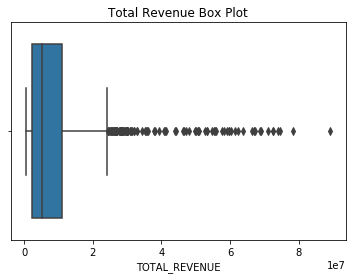

In [14]:
##revenue boxplot
sns.boxplot(rev_exp['TOTAL_REVENUE'])
plt.title('Total Revenue Box Plot')

This shows many potential outliers, but obviously it's only because of the difference between states like Texas and California versus tiny states like Rhode Island and Delaware. Let's keep exploring.

Text(0.5, 1.0, 'Total Revenue Distribution Plot')

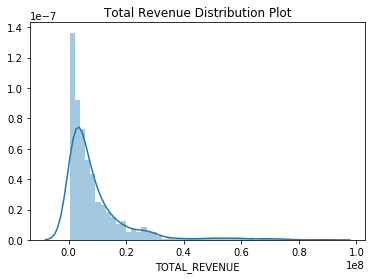

In [15]:
##distribution plot of revenue
sns.distplot(rev_exp['TOTAL_REVENUE'])
plt.title('Total Revenue Distribution Plot')

In [16]:
##lowest 5 total revenue
rev_exp.sort_values(by=['TOTAL_REVENUE']).head()

,STATE,YEAR,TOTAL_REVENUE,TOTAL_EXPENDITURE
92,SOUTH_DAKOTA,1993,465650.0,481665.0
143,SOUTH_DAKOTA,1994,507927.0,525289.0
41,SOUTH_DAKOTA,1992,551668.0,593126.0
34,NORTH_DAKOTA,1992,559481.0,553732.0
85,NORTH_DAKOTA,1993,580148.0,588983.0


In [17]:
##highest 5 total revenue
rev_exp.sort_values(by=['TOTAL_REVENUE']).tail()

,STATE,YEAR,TOTAL_REVENUE,TOTAL_EXPENDITURE
769,CALIFORNIA,2007,72516936.0,73225422.0
874,CALIFORNIA,2009,73958896.0,74766086.0
820,CALIFORNIA,2008,74626928.0,76618865.0
1182,CALIFORNIA,2015,78248042.0,78365958.0
1233,CALIFORNIA,2016,89217262.0,85320133.0


Even further evidence that these data seem correct: South Dakota revenue in 1993 versus California revenue in 2016 is obviously going to be an enourmous difference. The next step should be to create a column that is the difference between revenue and expenditure to normalize the data.

In [18]:
##create new deficit column
rev_exp['DEFICIT'] = rev_exp['TOTAL_REVENUE'] - rev_exp['TOTAL_EXPENDITURE']
rev_exp.head()

,STATE,YEAR,TOTAL_REVENUE,TOTAL_EXPENDITURE,DEFICIT
0,ALABAMA,1992,2678885.0,2653798.0,25087.0
1,ALASKA,1992,1049591.0,972488.0,77103.0
2,ARIZONA,1992,3258079.0,3401580.0,-143501.0
3,ARKANSAS,1992,1711959.0,1743022.0,-31063.0
4,CALIFORNIA,1992,26260025.0,27138832.0,-878807.0


In [19]:
##organize new df sorted by deficit
deficit_df = rev_exp.sort_values(by=['DEFICIT']).reset_index().drop(columns=['index'])
deficit_df.head()

,STATE,YEAR,TOTAL_REVENUE,TOTAL_EXPENDITURE,DEFICIT
0,TEXAS,2009,48087531.0,53575273.0,-5487742.0
1,NEW_YORK,2010,55453300.0,60067253.0,-4613953.0
2,CALIFORNIA,2005,62171797.0,66196072.0,-4024275.0
3,TEXAS,2008,46245975.0,50205827.0,-3959852.0
4,CALIFORNIA,2010,67356719.0,71227111.0,-3870392.0


Text(0.5, 1.0, 'Deficit Boxplot')

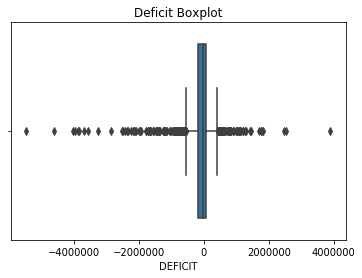

In [20]:
##deficit boxplot
sns.boxplot(deficit_df['DEFICIT'])
plt.title('Deficit Boxplot')

Text(0.5, 1.0, 'Deficit Distribution Plot')

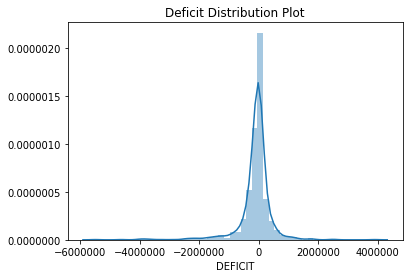

In [21]:
##deficit distribution plot
sns.distplot(deficit_df['DEFICIT'])
plt.title('Deficit Distribution Plot')

In [22]:
deficit_df['DEFICIT'].mean()

-106931.59185303515

While there are extreme values, it seems to be pretty normally distributed with the mean close to 0. However, we can normalize the data even more by creating a deficit per capita feature. However, per the assignment I will move onto examining one state.

## Data Exploration: Texas

In [24]:
##create Texas specific df
texas_edu = rev_exp.loc[rev_exp['STATE'] == 'TEXAS']
texas_edu.head()

,STATE,YEAR,TOTAL_REVENUE,TOTAL_EXPENDITURE,DEFICIT
43,TEXAS,1992,16264180.0,16119084.0,145096.0
94,TEXAS,1993,20267205.0,18574871.0,1692334.0
145,TEXAS,1994,19713604.0,19224149.0,489455.0
196,TEXAS,1995,20483376.0,20198924.0,284452.0
247,TEXAS,1996,22241369.0,22401797.0,-160428.0


Text(0.5, 1.0, 'Revenue and Expenditure of Texas Education')

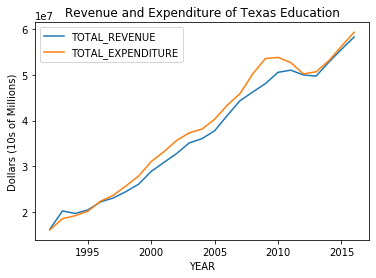

In [37]:
##plot Texas revenues and expenditures
sns.lineplot(x='YEAR', y='TOTAL_REVENUE', data=texas_edu, label='TOTAL_REVENUE')
sns.lineplot(x='YEAR', y='TOTAL_EXPENDITURE', data=texas_edu, label='TOTAL_EXPENDITURE')
plt.ylabel('Dollars (10s of Millions)')
plt.title('Revenue and Expenditure of Texas Education')

There's a consistent growth of both figures right alongside each other. There's only one downturn and it seems to be obviously correlated with the 2008 recession. Now let's explore math and reading scores per the assignment.

In [53]:
##create df for Texas academic scores only
texas_scores = education_df[['STATE','YEAR','AVG_MATH_4_SCORE','AVG_MATH_8_SCORE','AVG_READING_4_SCORE','AVG_READING_8_SCORE']]
texas_scores = texas_scores.loc[texas_scores['STATE'] == 'TEXAS'].reset_index().drop(columns=['STATE', 'index'])

In [54]:
texas_scores.head()

,YEAR,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992,217.918744,264.592828,212.394311,NaN
1,1993,NaN,NaN,NaN,NaN
2,1994,NaN,NaN,NaN,NaN
3,1995,NaN,NaN,NaN,NaN
4,1996,228.712920,270.199578,216.862012,263.591742


In [55]:
texas_scores.describe()

,YEAR,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,26.000000,11.000000,11.000000,11.000000,10.000000
mean,2004.500000,237.215740,280.455403,216.931348,264.998531
std,7.648529,7.888225,8.005144,2.153449,3.357866
min,1992.000000,217.918744,264.592828,212.394311,259.631360
25%,1998.250000,234.985976,275.949332,215.870253,262.433075
50%,2004.500000,240.943671,282.320510,216.932242,265.414883
75%,2010.750000,241.958603,286.277893,218.527334,266.951425
max,2017.000000,244.002472,290.346709,219.604313,270.700537
